OpenCV目标跟踪算法的使用大概可以分为以下几个步骤:

1. 创建MultiTracker对象.
2. 读取视频或摄像头数据.
3. 框选ROI区域
4. 给MultiTracker对象添加实际的追踪算法.
5. 对每一帧进行进行目标追踪.

In [5]:
import cv2

# MultiTracker_create以及一些其他的目标追踪算法在opencv4.5以后换了地方. 
# cv2.legacy.MultiTracker_create


# 定义OpenCV中的七种目标追踪算法
OPENCV_OBJECT_TRACKERS = {
    'boosting': cv2.legacy_TrackerBoosting.create,
    'csrt': cv2.legacy_TrackerCSRT.create,
    'kcf':  cv2.legacy.TrackerKCF.create,
    'mil': cv2.legacy.TrackerMIL.create,
    'tld': cv2.legacy_TrackerTLD.create,
    'medianflow': cv2.legacy_TrackerMedianFlow.create,
    'mosse': cv2.legacy_TrackerMOSSE.create  
}

trackers = cv2.legacy.MultiTracker_create()
cap = cv2.VideoCapture('./videos/soccer_01.mp4')

while True:
    flag, frame = cap.read()
    if frame is None:
        break
        
    # 变成黑白的
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 追踪目标
    success, boxes = trackers.update(frame)
    # 绘制追踪到的矩形区域
    for box in boxes:
        # box是个浮点型, 画图需要整型
        (x, y, w, h) = [int(v) for v in box]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    cv2.imshow('frame', frame)
    
    key = cv2.waitKey(100)
    if key == ord('s'):
        # 框选ROI区域
        roi = cv2.selectROI('frame', frame, showCrosshair=True, fromCenter=False)
#         print(roi)
        # 创建一个实际的目标追踪器
        tracker = OPENCV_OBJECT_TRACKERS['kcf']()
        trackers.add(tracker, frame, roi)
    elif key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [3]:
import cv2

# net = cv2.dnn.readNetFromCaffe()
# cv2.dnn.readNetFromDarknet
# cv2.dnn.readNetFromTensorflow
# cv2.dnn.readNetFromTorch
# cv2.dnn.readNet
cv2.dnn.readNet??

Docstring:
readNet(model[, config[, framework]]) -> retval
.   * @brief Read deep learning network represented in one of the supported formats.
.         * @param[in] model Binary file contains trained weights. The following file
.         *                  extensions are expected for models from different frameworks:
.         *                  * `*.caffemodel` (Caffe, http://caffe.berkeleyvision.org/)
.         *                  * `*.pb` (TensorFlow, https://www.tensorflow.org/)
.         *                  * `*.t7` | `*.net` (Torch, http://torch.ch/)
.         *                  * `*.weights` (Darknet, https://pjreddie.com/darknet/)
.         *                  * `*.bin` | `*.onnx` (OpenVINO, https://software.intel.com/openvino-toolkit)
.         *                  * `*.onnx` (ONNX, https://onnx.ai/)
.         * @param[in] config Text file contains network configuration. It could be a
.         *                   file with the following extensions:
.         *                  *

In [4]:
cv2.dnn.readNetFromTorch??

Docstring:
readNetFromTorch(model[, isBinary[, evaluate]]) -> retval
.   *  @brief Reads a network model stored in <a href="http://torch.ch">Torch7</a> framework's format.
.        *  @param model    path to the file, dumped from Torch by using torch.save() function.
.        *  @param isBinary specifies whether the network was serialized in ascii mode or binary.
.        *  @param evaluate specifies testing phase of network. If true, it's similar to evaluate() method in Torch.
.        *  @returns Net object.
.        *
.        *  @note Ascii mode of Torch serializer is more preferable, because binary mode extensively use `long` type of C language,
.        *  which has various bit-length on different systems.
.        *
.        * The loading file must contain serialized <a href="https://github.com/torch/nn/blob/master/doc/module.md">nn.Module</a> object
.        * with importing network. Try to eliminate a custom objects from serialazing data to avoid importing errors.
.        *
.

In [5]:
cv2.dnn.blobFromImage??

Docstring:
blobFromImage(image[, scalefactor[, size[, mean[, swapRB[, crop[, ddepth]]]]]]) -> retval
.   @brief Creates 4-dimensional blob from image. Optionally resizes and crops @p image from center,
.        *  subtract @p mean values, scales values by @p scalefactor, swap Blue and Red channels.
.        *  @param image input image (with 1-, 3- or 4-channels).
.        *  @param scalefactor multiplier for @p images values.
.        *  @param size spatial size for output image
.        *  @param mean scalar with mean values which are subtracted from channels. Values are intended
.        *  to be in (mean-R, mean-G, mean-B) order if @p image has BGR ordering and @p swapRB is true.
.        *  @param swapRB flag which indicates that swap first and last channels
.        *  in 3-channel image is necessary.
.        *  @param crop flag which indicates whether image will be cropped after resize or not
.        *  @param ddepth Depth of output blob. Choose CV_32F or CV_8U.
.        *  @de

In [ ]:
# 把图片变成tensor
blob = cv2.dnn.blobFromImage(img )
# 把图片给到网络进行预测
net.setInput(blob)
# 预测
net.forward()

In [21]:
# OpenCV和深度学习结合
config = './bvlc_googlenet.prototxt'
model = './bvlc_googlenet.caffemodel'

net = cv2.dnn.readNetFromCaffe(config, model)
# 读图片
img = cv2.imread('./smallcat.jpeg')

# 转化成tensor
blob = cv2.dnn.blobFromImage(img, 1.0, (224, 224), (104, 117, 123))
net.setInput(blob)
r = net.forward()
# print(r)
# 返回的是属于1000个物体的概率.
print(r.shape)

# 希望看一下, 概率前3的是什么物体. 
# 读类别
classes = []
with open('./synset_words.txt', 'r') as fp:
    # find返回找到字符串的索引
    classes = [x[x.find(' ') + 1:].strip() for x in fp]
# print(classes)
# 对得到的概率进行排序
order = sorted(r[0], reverse=True)

# 只要前三的概率
z = list(range(3))
for i in range(3):
    # 返回的是满足条件的索引
    z[i] = np.where(r[0] == order[i])[0][0]
    print('第', i + 1, '项匹配', classes[z[i]], end='')
    print('类所在行: ', z[i] + 1, ' ', '可能性: ', order[i])

(1, 1000)


<IPython.core.display.Javascript object>

第 1 项匹配 tabby, tabby cat类所在行:  282   可能性:  0.28682286


<IPython.core.display.Javascript object>

第 2 项匹配 Egyptian cat类所在行:  286   可能性:  0.15215755


<IPython.core.display.Javascript object>

第 3 项匹配 carton类所在行:  479   可能性:  0.050298814


In [4]:
from IPython.display import HTML
HTML("""
<video width=1024 controls>
  <source src="race_car.mp4" type="video/mp4">
</video>
""")

## 定义辅助函数

In [2]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import urllib

video_input_file_name = "race_car.mp4"

# 标注矩形
def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
     # 以p1/p2为左上右下角点画矩形，颜色为蓝色。线条宽度为2，类型为1
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

# 显示标注图像
def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy); plt.axis('off')    

# 添加注释，字体类型cv2.FONT_HERSHEY_SIMPLEX，字体比例=1，宽度为3
def drawText(frame, txt, location, color = (50,170,50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

In [3]:
tracker_types = ['BOOSTING', 'MIL','KCF', 'CSRT', 'TLD', 'MEDIANFLOW', 'GOTURN','MOSSE']

# Change the index to change the tracker type
tracker_type = tracker_types[2]

if tracker_type == 'BOOSTING':
    tracker = cv2.legacy_TrackerBoosting.create()
elif tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
elif tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
elif tracker_type == 'CSRT':
    tracker = cv2.legacy_TrackerCSRT.create()
elif tracker_type == 'TLD':
    tracker = cv2.legacy_TrackerTLD.create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy_TrackerMedianFlow.create()
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()   
else:
    tracker = cv2.legacy_TrackerMOSSE.create()

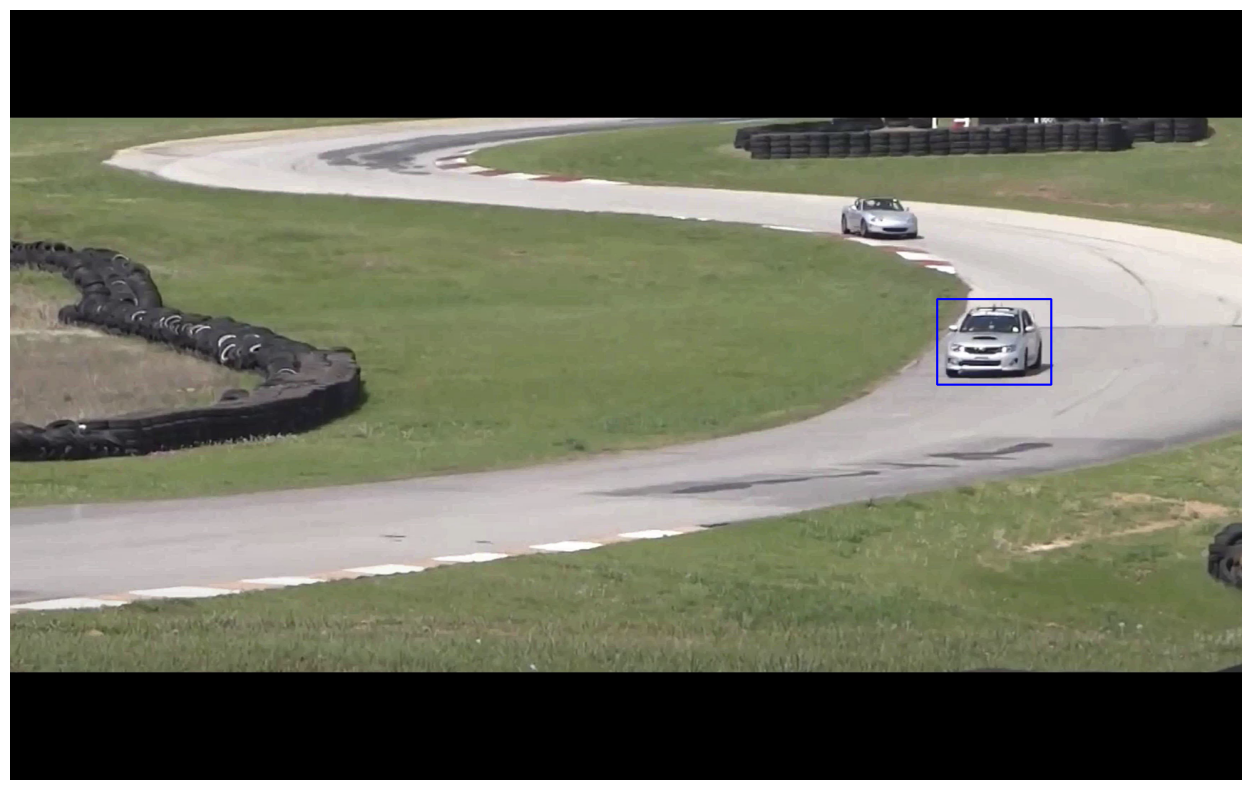

In [5]:
# 读取视频
video = cv2.VideoCapture(video_input_file_name)
flag, frame = video.read()

# 如果视频没有打开
if not video.isOpened():
    print("Could not open video")
    sys.exit()
    
# 获取帧的宽高
else : 
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
# 定义输出视频的文件名，并创建一个cv2.VideoWriter对象用于写入处理后的帧
video_output_file_name = 'race_car-' + tracker_type + '.mp4' 
video_out = cv2.VideoWriter(video_output_file_name,cv2.VideoWriter_fourcc(*'avc1'), 10, (width, height))

# 定义第一帧的边界框，或者使用cv2.selectROI让用户选择
bbox = (1300, 405, 160, 120)
#bbox = cv2.selectROI(frame, False)
#print(bbox)
displayRectangle(frame,bbox)

# 初始化边界框（init方法，返回一个布尔值，表示是否完成初始化）
ok = tracker.init(frame, bbox)

In [6]:
while True:
    flag, frame = video.read()
    if not flag:
        break 
    
    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # 计算帧率 (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

    # 画出边界框
    if ok:
        drawRectangle(frame, bbox)
    else :
        drawText(frame, "Tracking failure detected", (80,140), (0, 0, 255))

    # 在帧上绘制跟踪器类型和帧率信息
    drawText(frame, tracker_type + " Tracker", (80,60))
    drawText(frame, "FPS : " + str(int(fps)), (80,100))
    
    # 将处理后的帧写入输出视频
    video_out.write(frame)
    
video.release()
video_out.release()

In [7]:
# Tracker: KCF
HTML("""
<video width=1024 controls>
  <source src="race_car-KCF.mp4" type="video/mp4">
</video>
""")

In [ ]:
if not os.path.isfile('goturn.prototxt') or not os.path.isfile('goturn.caffemodel'):
    print("Downloading GOTURN model zip file")
    urllib.request.urlretrieve('https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=1', 'GOTURN.zip')
    
    # Uncompress the file
    !tar -xvf GOTURN.zip

    # Delete the zip file
    os.remove('GOTURN.zip')

In [3]:
import cv2

# 创建一个简单的测试
tracker = cv2.legacy.TrackerKCF_create()
multi_tracker = cv2.legacy.MultiTracker_create()

# 打开摄像头或视频
cap = cv2.VideoCapture(0)  # 使用摄像头测试
ret, frame = cap.read()

if ret:
    roi = cv2.selectROI('Test', frame)
    ok = multi_tracker.add(tracker, frame, roi)
    print(f"Tracker added: {ok}")

Tracker added: True


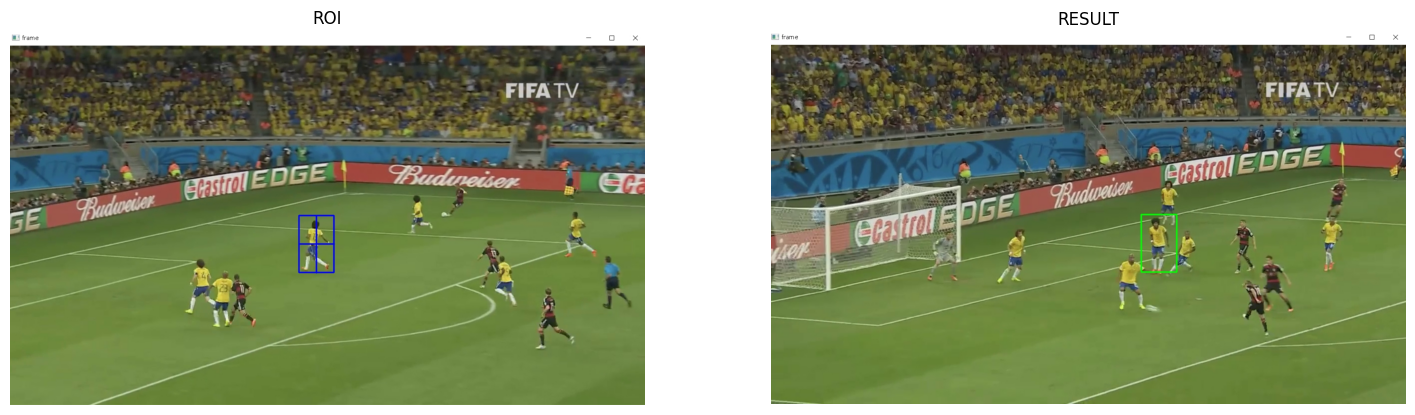

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1=cv2.imread('sport1.png')
img2=cv2.imread('sport2.png')
plt.figure(figsize=[18,9]);
plt.subplot(121); plt.imshow(img1[:,:,::-1]);plt.axis('off');plt.title("ROI");
plt.subplot(122); plt.imshow(img2[:,:,::-1]);plt.axis('off');plt.title("RESULT");